在本题题解过程中，将“A声称自己的仪器精度更高(误差更小)”的声明作为原假设。\
原假设为$H_0:\sigma^{2}_{A} < \sigma^{2}_{B}$\
备择假设为$H_1:\sigma^{2}_{A} \geq \sigma^{2}_{B}$\
取显著性水平$\alpha=0.05$。

由于$\frac{(\frac{S_A}{\sigma_A} )^2}{ ( \frac{S_B}{\sigma_B})^2}$满足 $F_{m-1,n-1}$分布，取统计量$F=\frac{S_A^2}{S_B^2}$。

F 统计量: 0.39065324038213134
P 值: 0.8075979553862574
F 临界值: 6.388232908695868


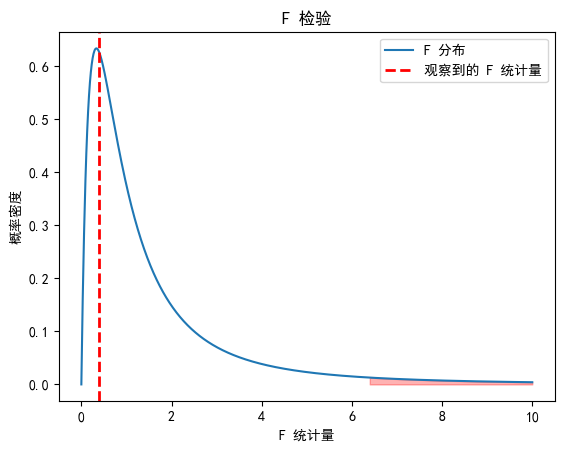

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 给出样本
A = np.array([118.5, 120.5, 120.4, 121.8, 121.1])
B = np.array([117.2, 119.3, 122.2, 118.3, 120.7])

# 计算样本方差
var_A = np.var(A, ddof=1)  
var_B = np.var(B, ddof=1)

# 计算统计量 F
F = var_A / var_B

# 计算自由度
df_A = len(A) - 1
df_B = len(B) - 1

# 计算 p 值
p_value = 1-st.f.cdf(F, df_A, df_B)

# 输出结果
print("F 统计量:", F)
print("P 值:", p_value)
F_critical_value = st.f.ppf(0.95, df_A, df_B) 

print("F 临界值:",F_critical_value)
# 绘制相关图
x = np.linspace(0, 10, 1000)
y = st.f.pdf(x, df_A, df_B)

plt.plot(x, y, label='F 分布')
plt.axvline(F, color='red', linestyle='dashed', linewidth=2, label='观察到的 F 统计量')
plt.fill_between(x, 0, y, where=(x >= F_critical_value), color='red', alpha=0.3) #标出拒绝域

plt.title('F 检验')
plt.xlabel('F 统计量')
plt.ylabel('概率密度')
plt.legend()
plt.show()



在上图中用红色标注出了拒绝原假设的拒绝域，显然F统计量的值未落在该区间范围，故接受原假设，即“A声称自己的仪器精度更高(误差更小)”的声明为真。同时，从另一角度，P值=0.8075979553862574>0.05，也应当接受原假设。

上述计算得F 临界值=6.388232908695868，故当$\frac{S_A^2}{S_B^2} > 6.388232908695868$时，拒绝原假设，该声明为假。

